In [1]:
import os
from collections import defaultdict
import random
import matplotlib.pyplot as plt
from functools import reduce
from random import choices

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

## Task 1

In [2]:
def read_text_sources():
    texts = []
    for filePath in os.listdir("./data"):
        with open(os.path.join("./data", filePath), "r") as file:
            texts.append(file.read())
    return texts

In [3]:
def count_letters(text_sources):
    counter = defaultdict(int)
    for text_source in text_sources:
        for letter in text_source:
            counter[letter] += 1
    return counter


def generaty_probabilities(text_sources):
    counter = count_letters(text_sources)
    sum_of_occurences = sum(counter.values())
    for key in counter.keys():
        counter[key] = counter[key] / sum_of_occurences
    return counter


def generate_text(text_sources, length):
    counter = generaty_probabilities(text_sources)
    letters, probabilities = list(counter.keys()), list(counter.values())
    return "".join(choices(letters, k=length, weights=probabilities))


def frequency_chart(counter):
    sorted_keys = sorted(counter.keys())
    plt.bar(sorted_keys, [counter[key] for key in sorted_keys])
    plt.show()

## Task 2

In [4]:
def task2():
    words = generate_text(["abcdefghijklmnopqrstuvwxyz "], 1000000).split()
    return sum(map(lambda x: len(x), words)) / len(words)


print("Average length of word is:", task2())

Average length of word is: 27.460102593331435


Its higher than 26, because sometimes double spaces occur.

## Task 3

Two most frequent: [' ', 'e']


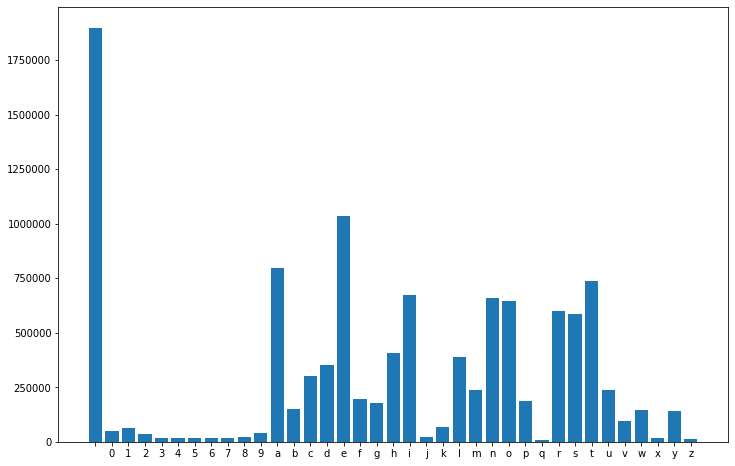

In [5]:
def task3():
    counter = count_letters(read_text_sources())
    print(
        "Two most frequent:",
        list(
            map(
                lambda y: y[0],
                sorted(counter.items(), key=lambda x: x[1], reverse=True)[:2],
            )
        ),
    )
    frequency_chart(counter)


task3()

Usually the more frequent the letter the shorter the morse code is

## Task 4

In [6]:
def task4():
    words = generate_text(read_text_sources(), 100000).split()
    return sum(map(lambda x: len(x), words)) / len(words)


print("Average length of word:", task4())

Average length of word: 5.823380637909231


## Task 5

Conditional propability of characters after: " "


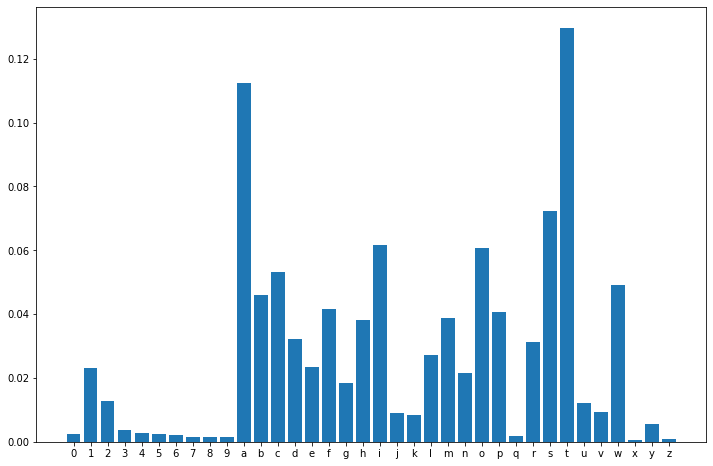

defaultdict(<class 'int'>, {'t': 0.12977536376950552, 'o': 0.06086303722513144, 'h': 0.03816392544437303, 'p': 0.04076009651350241, 'd': 0.03205649622269753, 'b': 0.046031988536387486, 'w': 0.04913654131852617, 's': 0.07226922631151945, 'c': 0.05317040533563729, 'a': 0.11244455214995416, 'i': 0.061820269942787304, 'e': 0.023494083806593683, 'r': 0.031270480144138066, 'v': 0.00919248964797859, 'm': 0.03874764247858475, 'k': 0.008241578775458598, 'u': 0.012081572875069804, 'g': 0.01827276654479554, 'l': 0.02715495896068866, 'f': 0.04174630435469766, 'q': 0.0018022526841500806, 'n': 0.02164968548820449, 'y': 0.0056585782170289435, 'j': 0.009062365002265328, 'z': 0.0009761982530634608, '1': 0.023155338271396812, '2': 0.012809111886122496, '3': 0.0037794097503924813, '5': 0.002357521415250398, '4': 0.0026530676753521794, '7': 0.0015172428326080771, '8': 0.001580988104394736, '0': 0.0023164294218672625, '6': 0.002012454034917658, 'x': 0.0005557955515283061, '9': 0.001419781053430128})
Condit

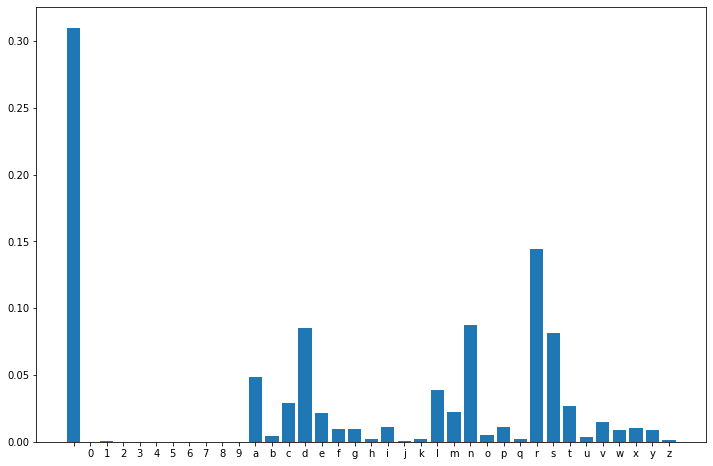

defaultdict(<class 'int'>, {' ': 0.31002558932179125, 'd': 0.08516099264560383, 't': 0.026627952883214814, 'n': 0.0873212680952027, 's': 0.08164547736971502, 'a': 0.04852608016185656, 'l': 0.03875850765314741, 'f': 0.00931968698207203, 'm': 0.022214736012988682, 'r': 0.14401643276552903, 'e': 0.021762024133693828, 'y': 0.008835121175236178, 'g': 0.009869891185052979, 'w': 0.00917972275499793, 'v': 0.014680799514275868, 'x': 0.010099625571560814, 'c': 0.029283412115496548, 'i': 0.010900800112743598, 'k': 0.0020106585172093255, 'p': 0.011071652996827155, 'h': 0.0021708934254458826, 'b': 0.004013594870166287, 'u': 0.0032925377831017812, 'q': 0.0020154848698670535, 'j': 0.00041603159909612067, 'o': 0.005311883735095016, 'z': 0.000982645401113343, '1': 0.00023552600969710776, '0': 3.185392754100228e-05, '8': 6.7568937208186655e-06, '2': 4.826352657727618e-05, '3': 3.8610821261820944e-05, '4': 2.8958115946365708e-05, '5': 8.108272464982399e-05, '7': 5.791623189273142e-06, '6': 7.722164252364

In [7]:
def task5():
    texts = read_text_sources()
    for freq_ch in [" ", "e"]:
        number_of_letter_pairs = 0
        freq_dict = defaultdict(int)
        for text in texts:
            number_of_letter_pairs += len(text) - 1
            for i in range(len(text) - 1):
                if text[i] == freq_ch:
                    freq_dict[text[i + 1]] += 1
        sum_seq_occur = sum(freq_dict.values())
        for key in freq_dict.keys():
            freq_dict[key] = freq_dict[key] / sum_seq_occur
        print('Conditional propability of characters after: "' + str(freq_ch) + '"')
        frequency_chart(freq_dict)
        print(freq_dict)


task5()

## Task 6

### a)

In [8]:
def firstOrder(text_sources):
    first_probabilities = defaultdict(lambda: defaultdict(int))
    number_of_letter_pairs = 0
    for text in text_sources:
        number_of_letter_pairs += len(text) - 1
        for l in range(len(text) - 1):
            first_probabilities[text[l]][text[l + 1]] += 1

    for key in first_probabilities.keys():
        sum_seq_occur = sum(first_probabilities[key].values())
        for next_key in first_probabilities[key].keys():
            first_probabilities[key][next_key] = (
                first_probabilities[key][next_key] / sum_seq_occur
            )
    return first_probabilities

In [9]:
def task6a(length):
    texts = read_text_sources()
    zeroth_probabilities = generaty_probabilities(texts)
    first_probabilities = firstOrder(texts)
    text = choices(
        list(zeroth_probabilities.keys()),
        weights=list(zeroth_probabilities.values()),
        k=1,
    )
    for i in range(length - 1):
        next_letter = choices(
            list(first_probabilities[text[-1]].keys()),
            weights=list(first_probabilities[text[-1]].values()),
            k=1,
        )[0]
        text.append(next_letter)
    return "".join(text)


task6a(1000)

'ithoudeurenn buglanacomlaivede sprriatau mutude pof my ceriee ad ucoge remphenes ow wof hed a by ctstad ononat aruiala she enladurealeron a fiamed jed m colsaherg wnto hande p suled was jeppoud tio menerted the t horv o ival lareroranllthif msesondorut k ve homid 3078783thaechin th in aund gedendys cinde sile mas homm ofutilal r ahrghoncrily spreconceren s thritis mal harsso se tis my brvonggy aft t win f he anghat t solagorg itretirmes towhaner 4 bal pt teyapal wacoonceray a 19 y pantef t eshe lbavere ataray ds e of uns ba w eril flilofthe theatomeree as oc 199 e 2 201an ine d h cocomif d odit anche winge hilly alithedonsca tivitwhatigre darireale aymasthisanidustwer ay d ctladidedumuthenalin ruallumalaleviorer wh d ced bed utwst sthes thelbbon ily sesthefl j rue nonitenire alesud ntocat ze ck toferofe pacher630 sterog byingrisenede th s med bedan se brunghera tiomis dr g hama kellal s inde w re s wt piok lerumaprhedsw ll ous t d hies cofrthe ec avicedel sinese 190006 as s cazathenzo

### b)

In [10]:
def gen_nth_order(nth_order):
    texts = read_text_sources()
    orders_dictionaries = [generaty_probabilities(texts)]
    for n in range(1, nth_order + 1):
        print("N: ", n)
        nth_dict = defaultdict(lambda: defaultdict(int))
        number_of_n_length_sequences = 0
        for text in texts:
            number_of_n_length_sequences += len(text) - n
            for l in range(len(text) - n):
                nth_dict[text[l : l + n]][text[l + n]] += 1
        for key in nth_dict.keys():
            sum_seq_occur = sum(nth_dict[key].values())
            for sub_key in nth_dict[key].keys():
                nth_dict[key][sub_key] = nth_dict[key][sub_key] / sum_seq_occur
        orders_dictionaries.append(nth_dict)
    return orders_dictionaries

In [11]:
def get_letter(nth_order_probs, pred_sequence):
    start_n = min(len(pred_sequence), len(nth_order_probs) - 1)
    for i in range(start_n, 0, -1):
        cut_seq = pred_sequence[-i:]
        if cut_seq in nth_order_probs[i]:
            return random.choices(
                list(nth_order_probs[i][cut_seq].keys()),
                k=1,
                weights=list(nth_order_probs[i][cut_seq].values()),
            )[0]
    return random.choices(
        list(nth_order_probs[0].keys()), k=1, weights=list(nth_order_probs[0].values())
    )[0]

In [12]:
def generate_nth_order_text(nth_orders, initial_sequence, length):
    text = initial_sequence
    for i in range(length):
        text += get_letter(nth_orders, text[-min(len(text), len(nth_orders)-1) :])
    return text

In [13]:
orders = gen_nth_order(7)

N:  1
N:  2
N:  3
N:  4
N:  5
N:  6
N:  7


## 1-7 order Markov Sequences without a starting word

In [14]:
for i in range(2, 9):
    print("-------------------------------")
    print(i-1, "th order Markov source")
    words = generate_nth_order_text(
        orders[:i], "probability", 100000
    ).split()  # longer text to take good average
    print("Average length of word:", sum(map(lambda x: len(x), words)) / len(words))
    print("-------------------------------")
    print(
        generate_nth_order_text(orders[:i], "", 250)
    )  # shorter text to print

-------------------------------
1 th order Markov source
Average length of word: 4.808235089145711
-------------------------------
n the the 198 he we c t themplplohin 83 waprionoponthed tumbor t g oofexter fly mun re inge ketir mousian biausosi at ton 17 pag o itov ice 92 ge ar es heraiot sttingy bol he aroby tist the rorllencar s suchs er t wnd wansharssaie aro sth s atotoghe 
-------------------------------
2 th order Markov source
Average length of word: 4.799814428206912
-------------------------------
ntry yand re pow ong plarnamp ing of hiz witionesturingto faric fireppoactublibing yer didlitions lowent cons the tisagere preenceaces atenemider elde asks let to nould the inglecruscolasehined was shoolozymp bey eaugh the acks 1996 95 mun of to ball
-------------------------------
3 th order Markov source
Average length of word: 4.84557835057572
-------------------------------
sonstrans curing phief alpadies turage of head arth jayal tally shed on mose in daimesiania at posine colo

## 1-7 order Markov Sequences with a starting word: 'probability'

In [15]:
for i in range(2, 9):
    print("-------------------------------")
    print(i-1, "th order Markov source")
    words = generate_nth_order_text(
        orders[:i], "probability", 100000
    ).split()  # longer text to take good average
    print("Average length of word:", sum(map(lambda x: len(x), words)) / len(words))
    print("-------------------------------")
    print(
        generate_nth_order_text(orders[:i], "probability", 250)
    )  # shorter text to print

-------------------------------
1 th order Markov source
Average length of word: 4.819726505673552
-------------------------------
probability tr 221980019892 a d re pay thayofacerubllo 15 eng ilem trece titi lorominalerom 193 s cowe thkican curmpe ar be ad jpit dund ffl 84 os ci hizaterulunor amit d s plamuas 20 ts itin bo gus eranthasaved 9ton the thitherioresede rs cthelucher thexatrtec
-------------------------------
2 th order Markov source
Average length of word: 4.871316191147118
-------------------------------
probability of theenthe privintedial gerater 200 wite a s papporenn of rourtows as ros aucanal st in ittemembes kaw wittateing and bors ing the boave in itybra di do cruch fra stray mand issm he oute fich and un 2010 20072 prod id faispay ith the leatity seps a
-------------------------------
3 th order Markov source
Average length of word: 4.818991097922849
-------------------------------
probability jamedica wallege was artic boo hanies in july belopean cretain before c